<a href="https://colab.research.google.com/github/dsdskm/ai/blob/ml/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.2.2 - KNN 알고리즘 : 농구선수 포지선 에측

## kNN 알고리즘의 장점과 단점
## 장점
### 1. 이해하기 쉽다
### 2. 숫자로 구분된 속성에 우수한 성능
### 3. 별도의 모델 학습이 필요 없다

## 단점
### 1. 예측 속도가 느리다
### 2. 예측값이 지역 정보에 많이 편향될 수 있다

In [49]:
import pandas as pd
import matplotlib.pyplot as plt # 시각화 라이브러리
import seaborn as sns # 시각화 라이브러리
%matplotlib inline

from sklearn.model_selection import train_test_split # 데이터 분할 라이브러리
from sklearn.neighbors import KNeighborsClassifier # kNN모델 교차 검증 라이브러리
from sklearn.model_selection import cross_val_score # kNN모델 교차 검증 라이브러리
from sklearn.metrics import accuracy_score

In [50]:
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")

In [51]:
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [52]:
df.Pos.value_counts()

,count
Pos,
SG,50
C,50


Text(0.5, 1.0, 'BLK and 3P in 2d plane')

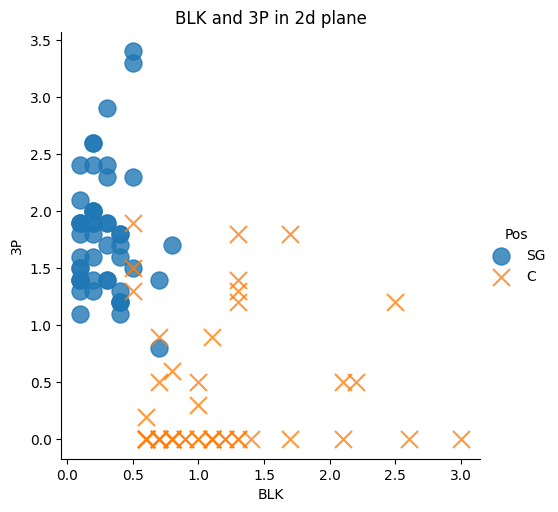

In [53]:
# 블로킹, 3점슛 데이터 시각화
sns.lmplot(x='BLK',y='3P',data=df, fit_reg=False,
           scatter_kws={"s":150},
           markers=["o","x"],
           hue="Pos")
# 타이틀
plt.title("BLK and 3P in 2d plane")



In [54]:
# 분별력이 없는 특징(feature)을 데이터에서 제거
df.drop(['2P','AST','STL'],axis=1,inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [55]:
# 다듬어진 데이터에서 20%를 테스트 데이터로 분류
train,test = train_test_split(df,test_size=0.2)
train.shape[0]
test.shape[0]

20

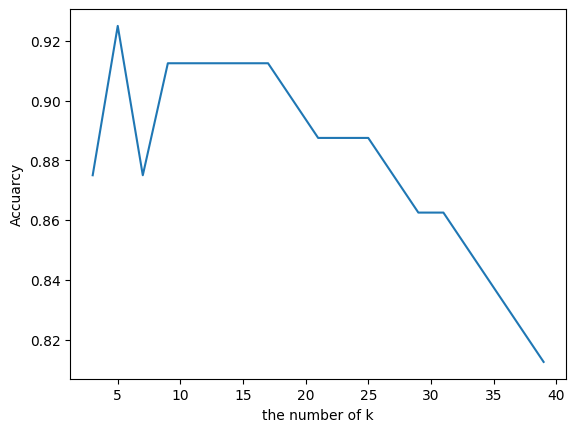

The best number of k : 5


In [56]:
# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습데이터 절반까지 지정
max_k_range = train.shape[0] //2
k_list = []
for i in range(3,max_k_range,2):
  k_list.append(i)

cross_validation_scores=[]
x_train = train[['3P','BLK','TRB']]
y_train = train[['Pos']]

# 교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn,x_train,y_train.values.ravel(),cv=10,scoring='accuracy') # rabel함수 : 다차원 배열을 1차원 배열로 평평하게 펴준다
  cross_validation_scores.append(scores.mean())

# k에 따른 정확도를 시각화
plt.plot(k_list,cross_validation_scores)
plt.xlabel("the number of k")
plt.ylabel("Accuarcy")
plt.show()

# 가장 높은 k를 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("The best number of k : "+str(k))

In [57]:
knn = KNeighborsClassifier(n_neighbors=k)

# 학습에 사용될 속성을 지정
x_train = train[['3P','BLK','TRB']]
# 선수 포지션을 예측할 값으로 지정
y_train = train[['Pos']]

# knn 모델 학습
knn.fit(x_train,y_train.values.ravel())

# 테스트 데이터에서 분류를 위해 사용될 속성을 지정
x_test = test[['3P','BLK','TRB']]
# 선수 포지션에 대한 정답을 지정
y_test = test[['Pos']]

# 테스트 시작
pred = knn.predict(x_test)

# 모델 예측 정확도(accuracy) 출력
print("accuracy : " +str(accuracy_score(y_test.values.ravel(),pred)))

# 실제값, 예측값 비교
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison


accuracy : 0.9


,prediction,ground_truth
0,SG,SG
1,C,C
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,C,C
8,C,C
9,SG,SG


# 4.3.2 - 서포트 벡터 머신(SVM) : 농구선수 포지션 예측

## SVM 알고리즘의 장점과 단점
## 장점
### 1. 커널 트릭을 사용함으로써 특성이 다양한 데이터를 분류하는데 강하다
### 2. 파라미터(C, gamma)를 조정해서 과대적합 및 과소적합에 대처할 수 있다
### 3. 적은 학습 데이터로도 딥러닝만큼 정확도가 높은 분류를 기대할 수 있다

## 단점
### 1. 데이터 전처리 과정이 상당이 중요하다
### 2. 특성이 많을 경우 결정 경계 및 데이터의 시각화가 어렵다

##결정 경계 : 서로 다른 분류값을 결정하는 경계
##서포트 벡터 : 결정 경계를 만드는 데 영향을 주는 최전방 데이터 포인트
##마진 : 결정 경계와 서포트 벡터 사이의 거리

##결정 경계 = N-1 차원
##커널트릭 : 저차원에서 결정 경계를 찾지 못할 때 고차원으로 데이터를 옮겨서 결정 경계를 찾는 방법

###=>가장 일반적으로 RBF커널을 사용
###RBF커널 : 함수의 표준편차를 조정함으로써 결정 경계의 곡률을 조정. 표준편차 조정 변수를 감마라고 부른다

#

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

In [59]:
def svc_param_selection(X,y,nfolds):
  svm_parameters=[
      {'kernel':['rbf'],
       'gamma':[0.00001,0.0001,0.001,0.01,0.1,1],
      'C':[0.01,0.1,1,10,100,1000]
      }]

      # 최적의 파라미터를 구함
  clf = GridSearchCV(SVC(),svm_parameters,cv=10)
  clf.fit(X_train,y_train.values.ravel())
  print(clf.best_params_)
  return clf
# 3점슛과 블로킹 횟수를 학습 데이터로 사용
X_train = train[['3P','BLK']]

# 농구 선수 포지션을 예측값으로 선정
y_train = train[['Pos']]

# 최적의 파라미터로 학습된 모델을 clf로 저장
clf = svc_param_selection(X_train,y_train.values.ravel(),10)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
# 시각화할 비용 후보들을 저장
C_candidates = []
C_candidates.append(clf.best_params_['C']*0.01)
C_candidates.append(clf.best_params_['C'])
C_candidates.append(clf.best_params_['C']*100)

# 시각화할 감마 후보들을 저장
gamma_candidates = []
gamma_candidates.append(clf.best_params_['gamma']*0.01)
gamma_candidates.append(clf.best_params_['gamma'])
gamma_candidates.append(clf.best_params_['gamma']*100)

# 3점슛과 블로킹 횟수로 학습
X = train[['3P','BLK']]
# 농구선수 포지션을 학습 모델의 분류값으로 사용
Y = train['Pos'].tolist()

# 시각화를 위해 센터(C)와 슈팅가드(SG)를 숫자로 표현
position = []
for gt in Y:
  if gt=='C':
    position.append(0)
  else:
    position.append(1)

classifiers = []

# 파라미터 후보들을 조합해서 학습된 모델들을 저장
for C in C_candidates:
  for gamma in gamma_candidates:
    clf = SVC(C=C,gamma=gamma)
    clf.fit(X,Y)
    classifiers.append((C,gamma,clf))

# 각 모델을 시각화
plt.figure(figsize=(18,18))
xx,yy = np.meshgrid(np.linspace(0,4,100),np.linspace(0,4,100))

for (k,(C,gamma,clf)) in enumerate(classifiers):
  Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.subplot(len(C_candidates),len(gamma_candidates),k+1)
  plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma),np.log10(C)),size='medium')

  plt.pcolormesh(xx,yy,-Z,cmap=plt.cm.RdBu)
  plt.scatter(X['3P'],X['BLK'],c=position,cmap=plt.cm.RdBu_r,edgecolors='k')

In [62]:
X_test = test[['3P','BLK']]
y_test = test[['Pos']]

# 최적의 파라미터로 학습된 모델로 테스트를 진행
y_true,y_pred = y_test,clf.predict(X_test)

print(classification_report(y_true,y_pred))
print()
print("Accuacy : "+str(accuracy_score(y_true,y_pred)))

comparison = pd.DataFrame({'prediction':y_pred,'ground_truth':y_true.values.ravel()})
comparison

              precision    recall  f1-score   support

           C       1.00      0.58      0.74        12
          SG       0.62      1.00      0.76         8

    accuracy                           0.75        20
   macro avg       0.81      0.79      0.75        20
weighted avg       0.85      0.75      0.75        20


Accuacy : 0.75


,prediction,ground_truth
0,SG,SG
1,SG,C
2,C,C
3,SG,SG
4,C,C
5,C,C
6,SG,C
7,SG,C
8,C,C
9,SG,SG


# 4.4.2 - 의사결정 트리

## 의사결정 트리의 장점과 단점
## 장점
### 1. 수학적인 지식이 없어도 결과를 해석하고 이해하기가 쉽다
### 2. 수치 데이터 및 범주 데이터에 모두 사용 가능하다

## 단점
### 1. 과대적합의 위험이 높다

## 의사결정 트리 알고리즘과 정보 엔트로피의 관계
질문 후의 정보 이득 = 질문 전의 엔트로피 - 질문 후의 엔트로피

## 지니 계수
## 1. 특징이 하상 이진 불류로 나뉠 때 사용
## 2. 지니 계수가 높을수록 순도가 높음 : 한 그룹에 모여있는 데이터들의 속성들이 많이 일치한다

## 의사결정트리는 오버피팅되기 쉬운 모델
## ID3를 사용할지, 지니계수를 사용할지, 트리의 깊이를 어느 정도까지 허용할지 등등을 고려하여 모델을 만들어야 한다

In [64]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},

            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},

            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},

            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]
train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district','longitude','latitude','label']]

dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},

            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},

            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},

            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]

In [65]:
train_df.label.value_counts()

,count
label,
Gangseo,5
Gangnam,5
Gangbuk,5
Gangdong,5


In [66]:
test_df.label.value_counts()

,count
label,
Gangseo,5
Gangnam,5
Gangbuk,5
Gangdong,5
